In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import glob
import os

In [2]:
%matplotlib notebook

# 1d case

In [13]:
fs = []
files = sorted(glob.glob('1d/data*hdf5'), key=os.path.getmtime)
for f in files:
    fs.append(h5py.File(f, 'r'))

In [14]:
fs[0]['Domain/x'].shape

(1024,)

In [15]:
fs[0]['Primitive/T'].shape

(1024,)

In [16]:
fs[0]['Domain'].attrs.keys()

<KeysViewHDF5 ['Ng', 'Nx', 'Ny', 'Nz', 'dt', 'dx', 'dy', 'dz', 'endTime', 'nx', 'ny', 'nz', 'xmax', 'xmin', 'ymax', 'ymin', 'zmax', 'zmin']>

In [17]:
print(f"Dissipation strength {fs[0].attrs['gamma'][0]}, relaxation time {fs[0].attrs['sigma'][0]}, timestep {fs[0]['Domain'].attrs['dt'][0]}")

Dissipation strength 1e-05, relaxation time 1e-05, timestep 0.000390625


In [18]:
fs[1]['Primitive/T'][:]

array([0.10006599, 0.10006599, 0.10006599, ..., 0.10006599, 0.10006599,
       0.10006599])

In [19]:
fs[-1].attrs['t']

array([10.])

<IPython.core.display.Javascript object>


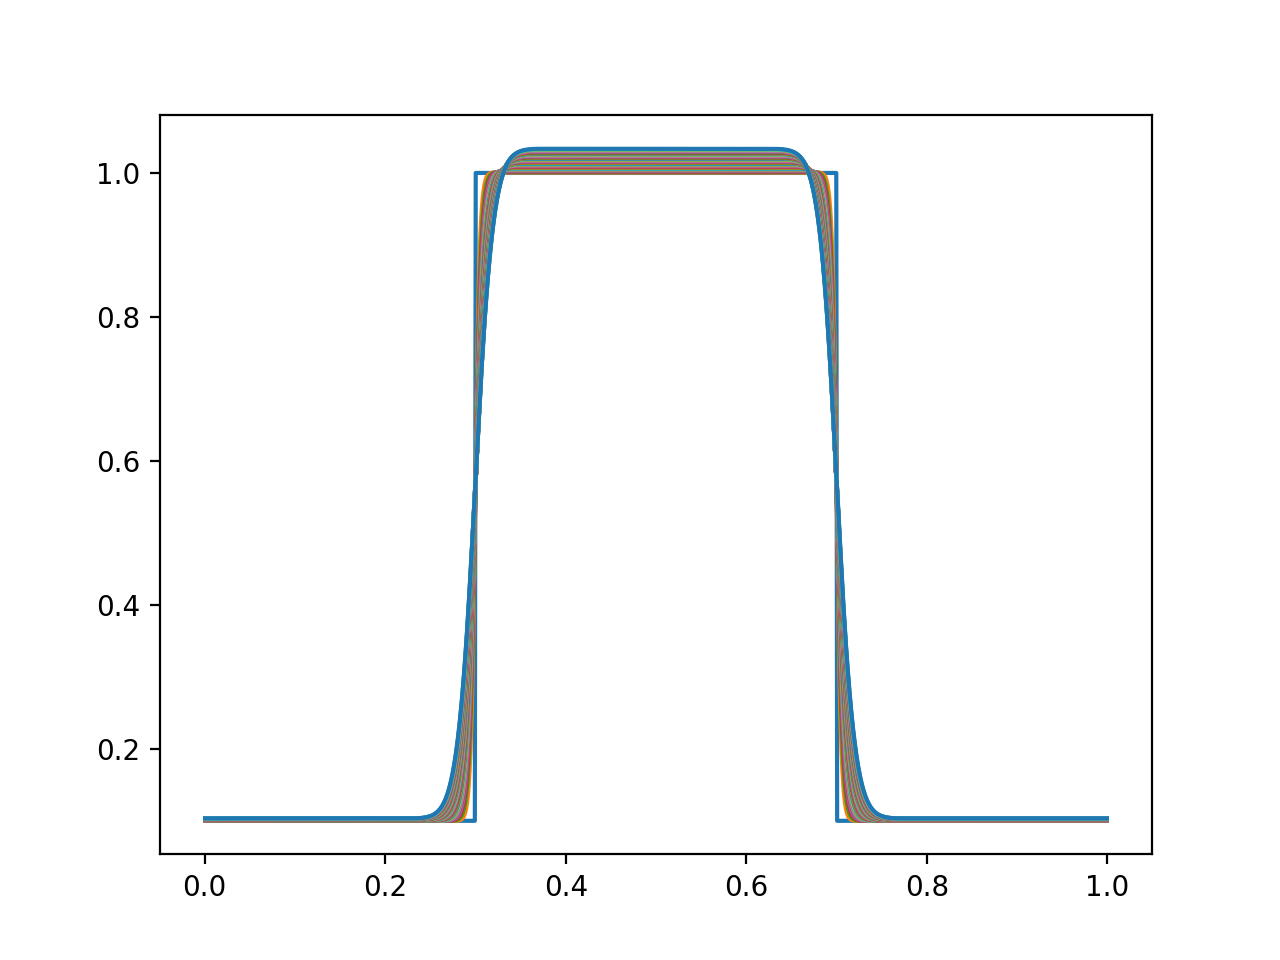

In [20]:
plt.figure()
for f in fs:
    plt.plot(f['Domain/x'], f['Primitive/T'])
plt.show()

<IPython.core.display.Javascript object>


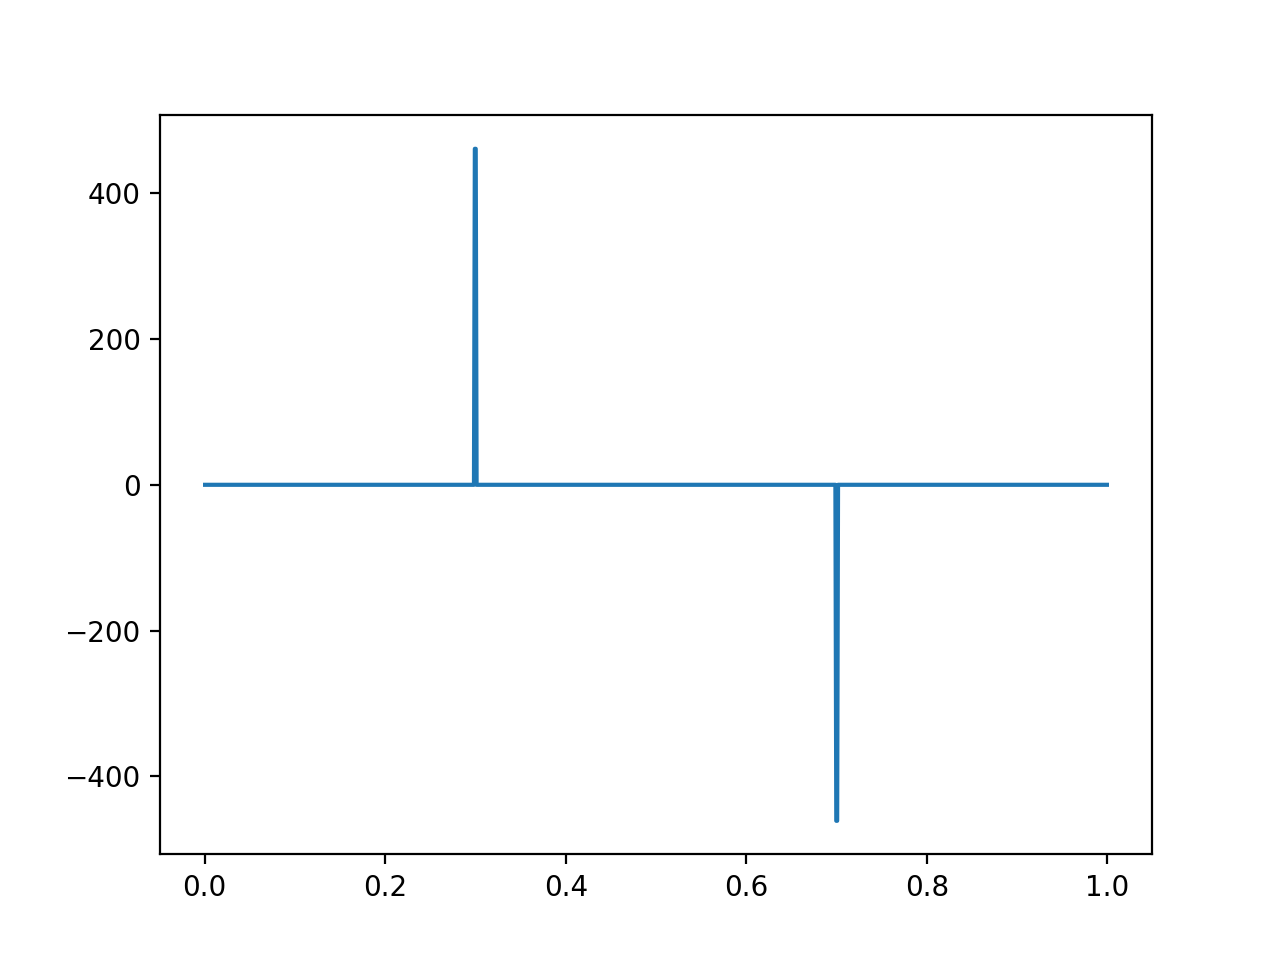

In [11]:
plt.figure()
for f in fs:
    plt.plot(f['Domain/x'], f['Auxiliary/dxT'])
plt.show()

In [ ]:
Tall = np.zeros((len(fs), fs[0]['Primitive/T'].shape[0]))
for i, f in enumerate(fs):
    Tall[i, :] = f['Primitive/T']

In [ ]:
plt.figure(figsize=(8,8))
plt.imshow(Tall, aspect='auto')
plt.show()

This figure is all about showing that the features propagate at the expected wave speed.

In [ ]:
plt.figure(figsize=(8,8))
t = np.linspace(fs[0].attrs['t'], fs[-1].attrs['t'], len(fs)).flatten()
x = fs[0]['Domain/x']
plt.contour(x, t, Tall)
speed = np.sqrt(fs[0].attrs['gamma']/fs[0].attrs['sigma'])
plt.plot(0.3+speed*t, t, 'r--', lw=3, alpha=0.4)
plt.plot(0.3-speed*t, t, 'r--', lw=3, alpha=0.4)
plt.plot(0.7+speed*t, t, 'r--', lw=3, alpha=0.4)
plt.plot(0.7-speed*t, t, 'r--', lw=3, alpha=0.4)
plt.show()

# 2d case

In [ ]:
fs = []
files = sorted(glob.glob('2d/data*hdf5'), key=os.path.getmtime)
for f in files:
    fs.append(h5py.File(f, 'r'))

In [ ]:
fs[0]['Domain'].attrs['dy']

In [ ]:
fs[0]['Domain/x'].shape

In [ ]:
fs[0]['Primitive/T'].shape

In [ ]:
print(f"Dissipation strength {fs[0].attrs['gamma'][0]}, relaxation time {fs[0].attrs['sigma'][0]}, timestep {fs[0]['Domain'].attrs['dt'][0]}")

In [ ]:
fs[-1].attrs['t']

In [ ]:
fig, axes = plt.subplots(5, 10, figsize=(10,5))
for f, ax in zip(fs[:50], axes.flatten()):
    ax.imshow(f['Primitive/T'], vmin=0, vmax=1)
#     ax.set_title(f"Time {f.attrs['t'][0]:.1f}")
    ax.axis('off')
# fig.tight_layout()
plt.subplots_adjust(wspace=0.02,hspace=0.02)
plt.show()

In [ ]:
nx, ny = fs[0]['Primitive/T'].shape
plt.figure()
for i in range(len(fs)//5):
    plt.plot(fs[5*i]['Domain/x'], fs[5*i]['Primitive/T'][:, ny//2])
    plt.plot(fs[5*i]['Domain/y'], fs[5*i]['Primitive/T'][nx//2, :])
plt.show()

In [ ]:
nx, ny = fs[0]['Primitive/T'].shape
plt.figure()
for i in range(len(fs)//5):
    plt.plot(fs[5*i]['Domain/x'], fs[5*i]['Primitive/qx'][:, ny//2])
    plt.plot(fs[5*i]['Domain/y'], fs[5*i]['Primitive/qy'][nx//2, :])
plt.show()

In [ ]:
nx, ny = fs[0]['Primitive/T'].shape
plt.figure()
for i in range(len(fs)//5):
    plt.plot(fs[5*i]['Domain/x'], fs[5*i]['Auxiliary/dxT'][:, ny//2])
    plt.plot(fs[5*i]['Domain/y'], fs[5*i]['Auxiliary/dyT'][nx//2, :])
plt.show()